# Titanic

#### Ora la sfida Titanic ospitata da Kaggle è una competizione in cui l'obiettivo è prevedere la sopravvivenza o 
#### la morte di un determinato passeggero sulla base di una serie di variabili che descrivono l'età, il sesso o 
#### la classe di passeggeri sulla barca.


In [3]:
# Import the basic python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
get_ipython().run_line_magic('matplotlib', 'inline')
sns.set(style='white', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read the datasets
train = pd.read_csv("train.csv")# non devo specificare la cartella perchè questo file è nella stessa cartella 
test = pd.read_csv("test.csv") # non devo specificare la cartella perchè questo file è nella stessa cartella 
IDtest = test["PassengerId"]
train.info()# We have 891 observations & 12 columns. See the mix of variable types.
test.info()# We have 417 observations & 11 columns (no response 'Survived' column).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [56]:
# Check missing values in train data set
train_na = (train.isnull().sum() / len(train)) * 100
print (train.isnull())
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
miss_train = pd.DataFrame({'Train Missing Ratio' :train_na})
miss_train.head()

     PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked

,Train Missing Ratio


In [61]:
# Check missing values in test data set
test_na = (test.isnull().sum() / len(test)) * 100
print (test.isnull())
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]
miss_test = pd.DataFrame({'Test Missing Ratio' :test_na})
miss_test.head()

     PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1     True     Fa

,Test Missing Ratio
Cabin,78.229665
Age,20.574163
Fare,0.239234


In [5]:
# Fill empty and NaNs values with NaN
#x = np.array([np.inf, -np.inf, np.nan, -128, 128])
#train = train.fillna(np.nan_to_num(np.inf))
#train = train.fillna(np.nan)
train = train.fillna(10)
print(train.fillna(np.nan))
test = test.fillna(np.nan)
print(test.fillna(np.nan))

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

#### PassengerId non rilevante dal punto di vista della modellazione, quindi elimineremo questa variabile in un secondo momento

#### Pclass è una variabile categoriale. Diamo un'occhiata alla distribuzione.

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


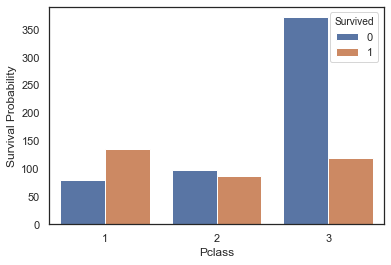

In [10]:
# Analyze the count of survivors by Pclass
ax = sns.countplot(x="Pclass", hue="Survived", data=train)
train[['Pclass', 'Survived']].groupby(['Pclass']).count().sort_values(by='Survived', ascending=False)

# Analyze the Survival Probability by Pclass
g = sns.barplot(x="Pclass",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived', ascending=False)

#### Approximately 62% of Pclass = 1 passenger survived followed by 47% of Pclass2.

#### Name: non rilevante dal punto di vista dell'analisi e della modellazione.
#### Rilasceremo questa funzione in seguito dopo aver creato una nuova variabile come Titolo.

#### Sex: Sulla base dell'analisi che segue, le donne avevano maggiori possibilità di sopravvivenza.



,Survived
Sex,
male,577
female,314


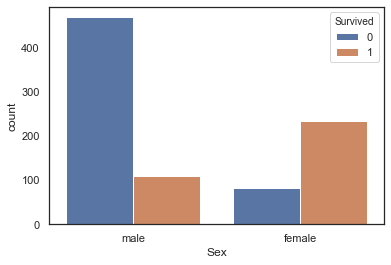

In [12]:
# Count the number of passengers by gender
ax = sns.countplot(x="Sex", hue="Survived", data=train)
# Analyze survival count by gender
train[["Sex", "Survived"]].groupby(['Sex']).count().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


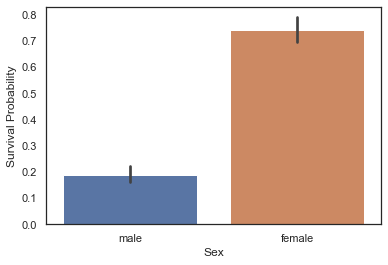

In [13]:
# Analyze the Survival Probability by Gender
g = sns.barplot(x="Sex",y="Survived",data=train)
g = g.set_ylabel("Survival Probability")
train[["Sex", "Survived"]].groupby(['Sex']).mean().sort_values(by='Survived', ascending=False)

#### Sulla base dei dati di cui sopra, i passeggeri di sesso femminile avevano maggiori possibilità di sopravvivenza 
#### rispetto ai passeggeri di sesso maschile

#### Age: L'intuizione di seguito si collega alla scena del film "Ladies and Kids First". Mostra che un buon numero di neonati e bambini è sopravvissuto.
    

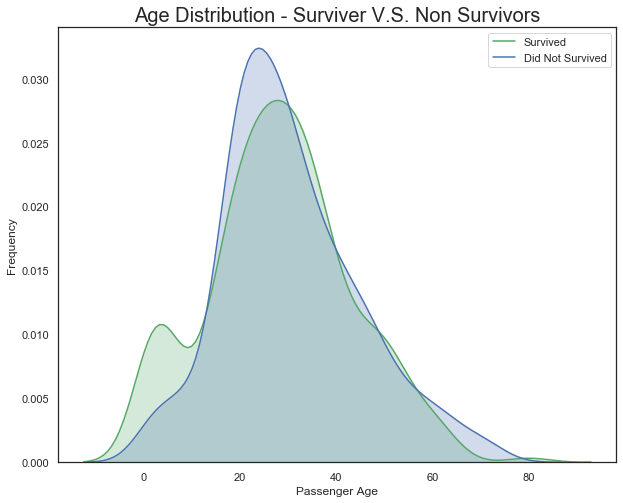

In [14]:
# Let's explore the distribution of age by response variable (Survived)
fig = plt.figure(figsize=(10,8),)
axis = sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
axis = sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='b',shade=True,label='Did Not Survived')
plt.title('Age Distribution - Surviver V.S. Non Survivors', fontsize = 20)
plt.xlabel("Passenger Age", fontsize = 12)
plt.ylabel('Frequency', fontsize = 12);

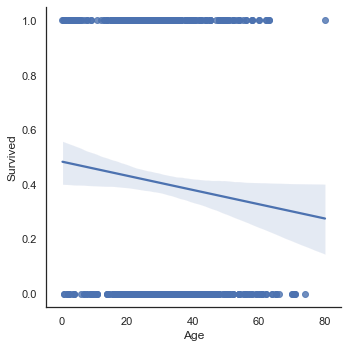

In [4]:
sns.lmplot('Age','Survived',data=train)
# We can also say that the older the passenger the lesser the chance of survival

#### SibSP: la sua variabile si riferisce al numero di fratelli / coniugi a bordo.
#### SibSP = 1 e SibSP = 2 mostrano maggiori possibilità di sopravvivenza.

,Survived
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


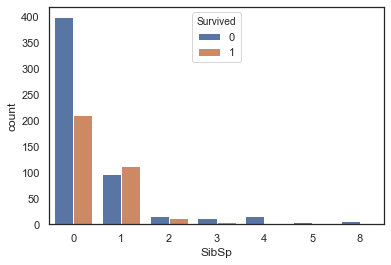

In [5]:
# Analyze the count of survivors by SibSP
ax = sns.countplot(x="SibSp", hue="Survived", data=train)
train[['SibSp', 'Survived']].groupby(['SibSp']).count().sort_values(by='Survived', ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


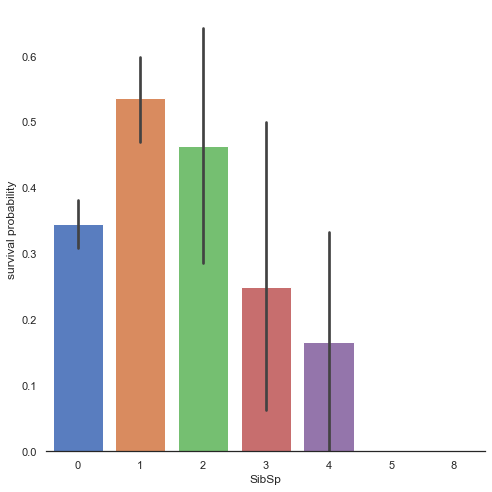

In [6]:
# Analyze probability of survival by SibSP
g  = sns.factorplot(x="SibSp",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["SibSp", "Survived"]].groupby(['SibSp']).mean().sort_values(by='Survived', ascending=False)

#### Parch: Parch indica il numero di genitori / figli a bordo del Titanic. Si noti che Parch = 3 e Parch = 1 mostrano maggiori probabilità di sopravvivenza.

,Survived
Parch,
0,678
1,118
2,80
3,5
5,5
4,4
6,1


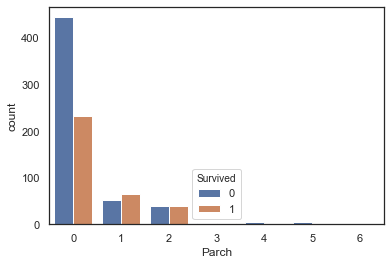

In [7]:
# Analyze the count of survivors by Parch

ax = sns.countplot(x="Parch", hue="Survived", data=train)
train[['Parch', 'Survived']].groupby(['Parch']).count().sort_values(by='Survived', ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


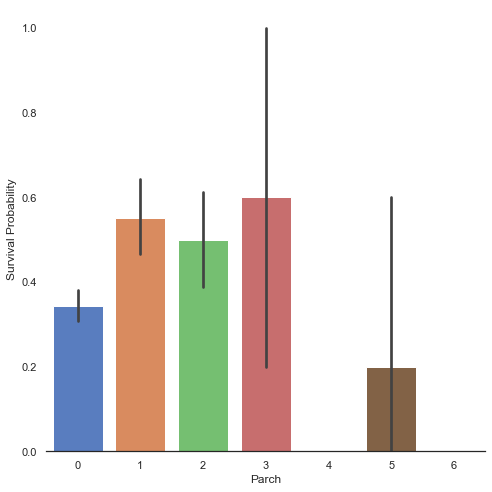

In [8]:
# Analyze the Survival Probability by Parch
g  = sns.factorplot(x="Parch",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
train[["Parch", "Survived"]].groupby(['Parch']).mean().sort_values(by='Survived', ascending=False)

#### Ticket: Questa variabile ha un valore alfanumerico che potrebbe non essere direttamente correlato a Sopravvivenza, ma possiamo usare questa variabile per creare alcune funzionalità aggiuntive.

In [9]:
train['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

#### Fare (Tariffa): Controlliamo prima la distribuzione.


 mu = 32.20 and sigma = 49.67



Text(0.5, 1.0, 'Fare distribution')

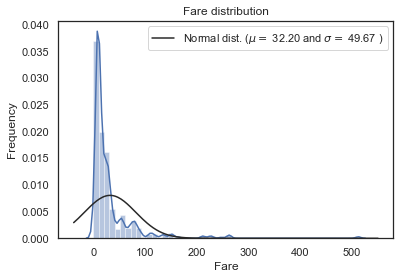

In [11]:
from scipy.stats import norm, skew #for some statistics
sns.distplot(train['Fare'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Fare'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Frequency')
plt.title('Fare distribution')

#### La variabile tariffaria è distorta. Dobbiamo trasformare questa variabile usando la funzione log e renderla più normalmente distribuita. 
#### Lo faremo durante il processo di ingegneria delle funzionalità.

#### Cabin: Variabile alfanumerica.

#### 687 valori mancanti nel treno e 327 valori mancanti nei dati di test - che devono essere trattati. Possiamo creare più funzionalità usando questa variabile Cabin.

In [13]:
# Let's check the unique values
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

#### Embarked :
#### C = Cherbourg, Q = Queenstown, S = Southampton
#### Esploriamo la variabile con il tasso di sopravvivenza. Imbarco rappresenta il porto di imbarco. Come l'output di analisi che segue suggerisce che Emabrked C mostra alte probabilità di sopravvivenza.

,Survived
Embarked,
S,644
C,168
Q,77


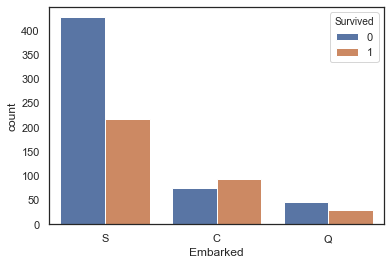

In [14]:
# Analyze the count of survivors by Embarked variable

ax = sns.countplot(x="Embarked", hue="Survived", data=train)
train[['Embarked', 'Survived']].groupby(['Embarked']).count().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


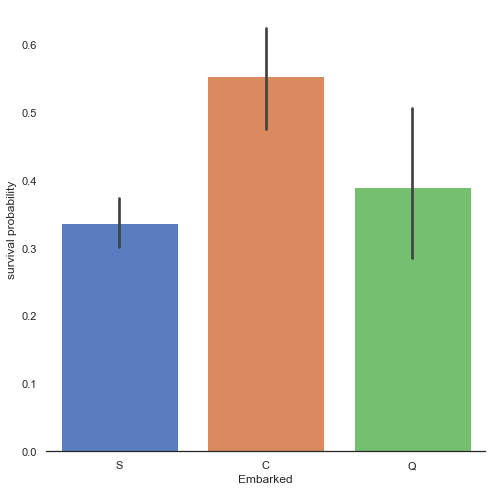

In [17]:
# Analyze the Survival Probability by Embarked
g  = sns.factorplot(x="Embarked",y="Survived",data=train,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("survival probability")
train[["Embarked", "Survived"]].groupby(['Embarked']).mean().sort_values(by='Survived', ascending=False)

#### Additional analysis

##### Creiamo alcuni grafici aggiuntivi per vedere come le diverse variabili sono correlate.

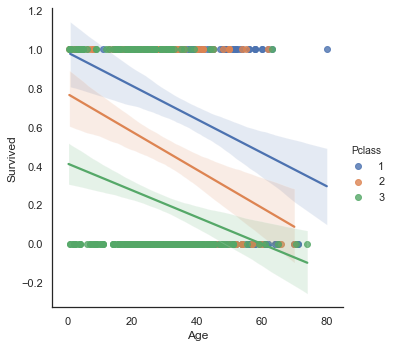

In [18]:
# Age, Pclass & Survival

sns.lmplot('Age','Survived',data=train,hue='Pclass')

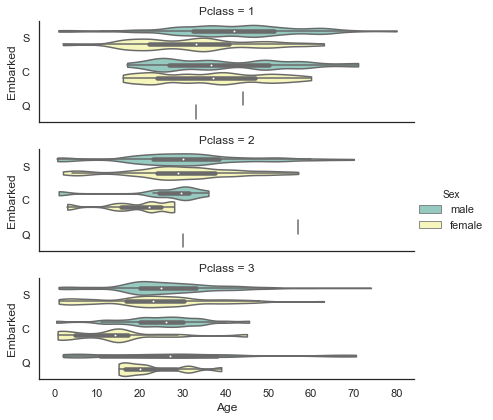

In [19]:
# Age, Embarked, Sex, Pclass

g = sns.catplot(x="Age", y="Embarked",  hue="Sex", row="Pclass",   data=train[train.Embarked.notnull()], 
orient="h", height=2, aspect=3, palette="Set3",  kind="violin", dodge=True, cut=0, bw=.2)

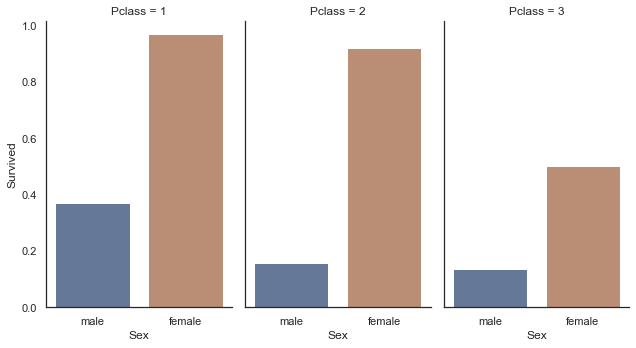

In [20]:
# Relation among Pclass, Gender & Survival Rate

g = sns.catplot(x="Sex", y="Survived", col="Pclass", data=train, saturation=.5, kind="bar", ci=None, aspect=.6)

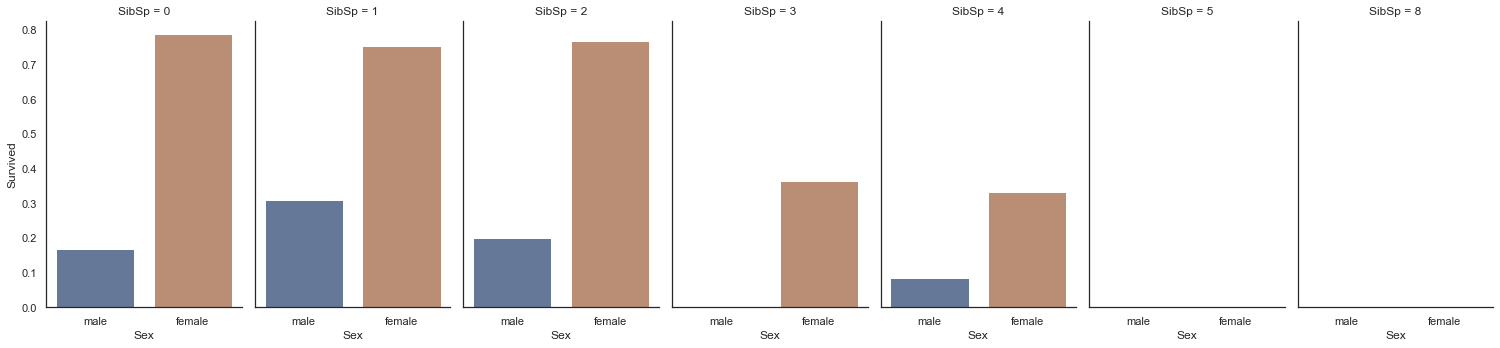

In [21]:
# Relation among SibSP, Gender & Survival Rate

g = sns.catplot(x="Sex", y="Survived", col="SibSp", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)

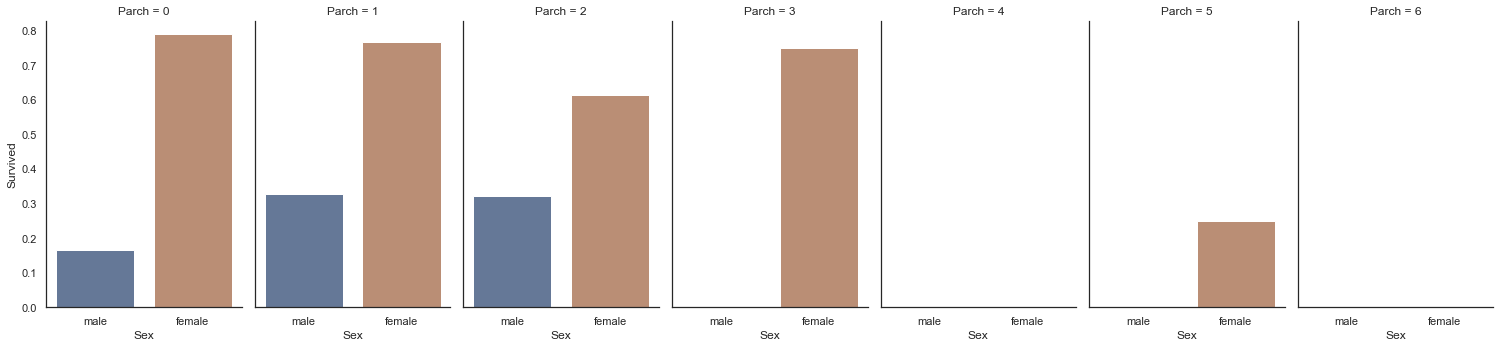

In [22]:
# Relation among Parch, Gender & Survival Rate
g = sns.catplot(x="Sex", y="Survived", col="Parch", data=train, saturation=.5,kind="bar", ci=None, aspect=.6)

# Feature engineering

#### Cosa dobbiamo fare per elaborare le seguenti variabili:

#### PassengerID - No action required

#### PClass - Have only 3 numerical values. We will use it as it is.

#### Name - Can be used to create new variable Title by extracting the salutation from name.

####  Sex - Create dummy variables

#### Age - Missing value treatment, followed by creating dummy variables

#### SibSP - Drop the variable

#### Parch - Drop the variable as most of the values are 0

#### Ticket - Create dummy variables post feature engineering

#### Fare - Missing value treatment followed by log normalization

#### Cabin - Create dummy variables post feature engineering

#### Embarked - Create dummy variables

#### Let's combining train & test for quick feature engineering. 
#### L'origine variabile è un tipo di tag che indica l'origine dati nei dati combinati.

In [6]:
train['source']='train'
test['source']='test'
combdata = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, combdata.shape)

(891, 13) (418, 12) (1309, 13)


#### PassengerID

In [7]:
# PassengerID - Drop PassengerID
combdata.drop(labels = ["PassengerId"], axis = 1, inplace = True)

#### Pclass

In [8]:
# Pclass 
combdata['Pclass'].unique()

array([3, 1, 2], dtype=int64)

#### Name

In [9]:
# Name - Extract Salutation from Name variable

salutation = [i.split(",")[1].split(".")[0].strip() for i in combdata["Name"]]
combdata["Title"] = pd.Series(salutation)
combdata["Title"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Don               1
Mme               1
Jonkheer          1
Dona              1
the Countess      1
Capt              1
Sir               1
Name: Title, dtype: int64

#### Title

In [10]:
# Name - Create 5 major categories & analyze the survival rate

combdata['Title'] = combdata['Title'].replace('Mlle', 'Miss')
combdata['Title'] = combdata['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
combdata.Title.loc[ (combdata.Title !=  'Master') & (combdata.Title !=  'Mr') & 
                   (combdata.Title !=  'Miss')  & (combdata.Title !=  'Mrs')] = 'Others'
combdata["Title"].value_counts()

Mr        757
Miss      262
Mrs       201
Master     61
Others     28
Name: Title, dtype: int64

In [11]:
# inspect the correlation between Title and Survived
combdata[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.701087
2,Mr,0.156673
3,Mrs,0.796875
4,Others,0.318182


In [12]:
# Create dummy variable 
combdata = pd.get_dummies(combdata, columns = ["Title"])

#### Fare

In [15]:
# Fare - Check the number of missing value
combdata["Fare"].isnull().sum()
#print(combdata["Fare"].isnull().sum())

# Only 1 value is missing so we will fill the same with median
combdata["Fare"] = combdata["Fare"].fillna(combdata["Fare"].median())

# Use the numpy fuction log1p which  applies log(1+x) to all elements of the column
# combdata["Fare"] = np.log1p(combdata["Fare"])

#Check the new distribution 
# sns.distplot(combdata['Fare'] , fit=norm);

In [16]:
# bin Fare into five intervals with equal amount of people
combdata['Fare-bin'] = pd.qcut(combdata.Fare,5,labels=[1,2,3,4,5]).astype(int)

# inspect the correlation between Fare-bin and Survived
combdata[['Fare-bin', 'Survived']].groupby(['Fare-bin'], as_index=False).mean()

,Fare-bin,Survived
0,1,0.217877
1,2,0.201087
2,3,0.426901
3,4,0.443243
4,5,0.645349


#### Age

#### Esistono 2 modi per gestire i valori di età mancanti.
#### Riempi l'età con un'età media di file simili in base a Sesso, Pclass, Parch e SibSP
#### oppure utilizza un algoritmo di apprendimento automatico rapido per prevedere i valori di età in base a età, 
#### titolo, tariffa e SibSP
#### Li ho usati entrambi per verificare quale funziona meglio. Uno del codice sarà contrassegnato 
#### da un markdown per evitare confusione.

#### Questa sezione del codice riguarda il trattamento del valore mancante per età. Invece di sostituire direttamente i valori mancanti con il valore mediano dei dati completi, lo script cerca i dati vicini che sono simili in termini di Sex, Pclass, Parch e SibSp e quindi prende
i valori mediani di tali osservazioni.

Ad esempio, se mancano le mie informazioni sullo stipendio, non puoi semplicemente sostituire 
il valore mancante con lo stipendio mediano di tutta la mia organizzazione.
Cercherai persone con esperienza, tipo di lavoro, dipartimento, ecc. Simili e poi utilizzerai 
lo stipendio mediano di tale gruppo.

In [29]:
# Index of NaN age rows
#missing_index = list(combdata["Age"][combdata["Age"].isnull()].index)

#for i in missing_index :
#     median_age = combdata["Age"].median()
#     filled_age = combdata["Age"][((combdata['Sex'] == combdata.iloc[i]["Sex"]) & 
#                                (combdata['SibSp'] == combdata.iloc[i]["SibSp"]) & 
#                                (combdata['Parch'] == combdata.iloc[i]["Parch"]) & 
#                                (combdata['Pclass'] == combdata.iloc[i]["Pclass"]))].median()
#     if not np.isnan(filled_age) :
#         combdata['Age'].iloc[i] = filled_age
#     else :
#         combdata['Age'].iloc[i] = median_age
            
#print(median_age)
#print(filled_age)

24.75
15.0


#### 2nd approach to treat the Age feature

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
combdata_temp = combdata[['Age','Title_Master','Title_Miss','Title_Mr','Title_Mrs','Title_Others','Fare-bin','SibSp']]

X  = combdata_temp.dropna().drop('Age', axis=1)
Y  = combdata['Age'].dropna()
holdout = combdata_temp.loc[np.isnan(combdata.Age)].drop('Age', axis=1)

regressor = RandomForestRegressor(n_estimators = 300)
#regressor = GradientBoostingRegressor(n_estimators = 500)
regressor.fit(X, Y)
y_pred = np.round(regressor.predict(holdout),1)
combdata.Age.loc[combdata.Age.isnull()] = y_pred

combdata.Age.isnull().sum(axis=0) 

ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required.

In [31]:
bins = [ 0, 4, 12, 18, 30, 50, 65, 100] # This is somewhat arbitrary...
age_index = (1,2,3,4,5,6,7)

combdata['Age-bin'] = pd.cut(combdata.Age, bins, labels=age_index).astype(int)
combdata[['Age-bin', 'Survived']].groupby(['Age-bin'],as_index=False).mean()


,Age-bin,Survived
0,1,0.675000
1,2,0.315534
2,3,0.428571
3,4,0.355556
4,5,0.423237
5,6,0.375000
6,7,0.125000


#### Sex

In [32]:
# Sex - Create dummy variables
combdata["Sex"] = combdata["Sex"].map({"male": 0, "female":1}) 
# combdata = pd.get_dummies(combdata, columns = ["Sex"])

#### Creating Family Size variable using SibSp & Parch

In [34]:
# Create a variable representing family size from SibSp and Parch
combdata["Fsize"] = combdata["SibSp"] + combdata["Parch"] + 1

# Analyze the correlation between Family and Survived
combdata[['Fsize', 'Survived']].groupby(['Fsize'], as_index=False).mean()

# Create new feature of family size
# combdata['Single'] = combdata['Fsize'].map(lambda s: 1 if s == 1 else 0)
# combdata['SmallF'] = combdata['Fsize'].map(lambda s: 1 if  s == 2  else 0)
# combdata['MedF'] = combdata['Fsize'].map(lambda s: 1 if 3 <= s <= 4 else 0)
# combdata['LargeF'] = combdata['Fsize'].map(lambda s: 1 if s >= 5 else 0)

,Fsize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


,Survived
Fsize,
4,0.724138
3,0.578431
2,0.552795
1,0.303538
0,0.161290


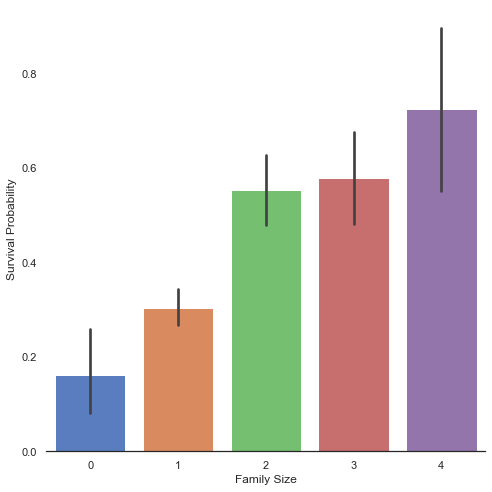

In [35]:
# Analyze the Survival Probability by Fsize

combdata.Fsize = combdata.Fsize.map(lambda x: 0 if x > 4 else x)
g  = sns.factorplot(x="Fsize",y="Survived",data=combdata,kind="bar", size = 7 ,palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Survival Probability")
g = g.set_xlabels("Family Size")
combdata[["Fsize", "Survived"]].groupby(['Fsize']).mean().sort_values(by='Survived', ascending=False)

#### SibSp

In [36]:
# SibSp - Drop the variable
combdata = combdata.drop(labels='SibSp', axis=1)

#### Parch

In [37]:
# Parch - Drop the variable
combdata = combdata.drop(labels='Parch', axis=1)

#### Ticket

#### I biglietti sono di 2 tipi qui.

#### Il tipo 1 ha solo un numero e il tipo 2 è una combinazione di un codice seguito dal numero. 
#### Estraiamo la prima cifra e confrontiamola con la probabilità di sopravvivenza.

In [39]:
# Ticket - Extracting the ticket prefix. This might be a representation of class/compartment.

combdata.Ticket = combdata.Ticket.map(lambda x: x[0])

# inspect the correlation between Ticket and Survived
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.200000
4,5,0.000000
5,6,0.166667
6,7,0.111111
7,8,0.000000
8,9,1.000000
9,A,0.068966


In [40]:
# Let's look at the number of people for each type of tickets
combdata['Ticket'].value_counts()

3    429
2    278
1    210
P     98
S     98
C     77
A     42
W     19
F     13
7     13
4     11
6      9
L      5
5      3
9      2
8      2
Name: Ticket, dtype: int64

#### La maggior parte di questi biglietti appartiene alla categoria 1, 2, 3, S, P, C. 
#### In base al conteggio dei valori e alla sopravvivenza media, possiamo inserire tutte le altre categorie di biglietti
#### in una nuova categoria "4".

In [41]:
combdata['Ticket'] = combdata['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')

# check the correlation again
combdata[['Ticket', 'Survived']].groupby(['Ticket'], as_index=False).mean()

,Ticket,Survived
0,1,0.630137
1,2,0.464481
2,3,0.239203
3,4,0.166667
4,C,0.340426
5,P,0.646154
6,S,0.323077


In [42]:
# Create dummy variables
combdata = pd.get_dummies(combdata, columns = ["Ticket"], prefix="T")

#### Cabin

In [47]:
# Cabin - Replace the missing Cabin number by the type of cabin unknown 'U'
combdata["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'U' for i in combdata['Cabin'] ])

TypeError: 'int' object is not subscriptable

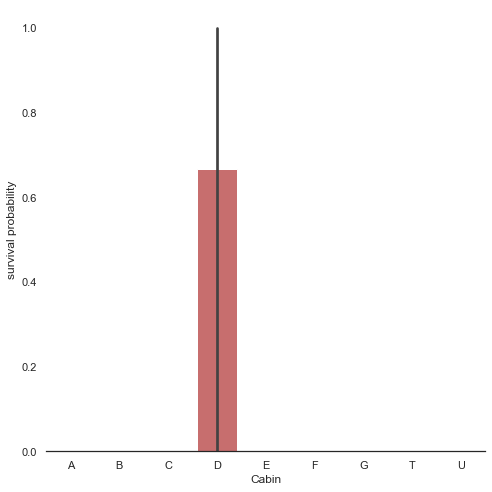

In [49]:
# Let's plot the survival probability by Cabin
g  = sns.factorplot(x="Cabin",y="Survived",data=combdata,kind="bar", size = 7 ,
                    palette = "muted",order=['A','B','C','D','E','F','G','T','U'])
g.despine(left=True)
g = g.set_ylabels("survival probability")

In [50]:
combdata = combdata.drop(labels='Cabin', axis=1)

#### Embarked

In [51]:
combdata = combdata.drop(labels='Embarked', axis=1)

In [52]:

combdata =combdata.drop(labels=['Age', 'Fare', 'Name'],axis = 1)

In [53]:
combdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        1309 non-null   int64  
 2   Sex           1309 non-null   int64  
 3   source        1309 non-null   object 
 4   Title_Master  1309 non-null   uint8  
 5   Title_Miss    1309 non-null   uint8  
 6   Title_Mr      1309 non-null   uint8  
 7   Title_Mrs     1309 non-null   uint8  
 8   Title_Others  1309 non-null   uint8  
 9   Fare-bin      1309 non-null   int32  
 10  Age-bin       1309 non-null   int32  
 11  Fsize         1309 non-null   int64  
 12  T_1           1309 non-null   uint8  
 13  T_2           1309 non-null   uint8  
 14  T_3           1309 non-null   uint8  
 15  T_4           1309 non-null   uint8  
 16  T_C           1309 non-null   uint8  
 17  T_P           1309 non-null   uint8  
 18  T_S           1309 non-null 

# Creating a Model

In [55]:
# Import the required libraries
from sklearn.svm import SVC
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

In [56]:
## Separate train dataset and test dataset using the index variable 'source'

train = combdata.loc[combdata['source']=="train"]
test = combdata.loc[combdata['source']=="test"]
test.drop(labels=["Survived"],axis = 1,inplace=True)
train.drop(labels=["source"],axis = 1,inplace=True)
test.drop(labels=["source"],axis = 1,inplace=True)

# You may want to drop some variables to avoid dummy variable trap
# test.drop(labels=['source','Sex_male', 'Fsize', 'LargeF', 'SibSp_8','Parch_9','T_WEP','Cabin_T','Emb_Q'],axis = 1,inplace=True)
test.shape

(418, 17)

In [57]:
## Separate train features and label 

train["Survived"] = train["Survived"].astype(int)
Y_train = train["Survived"]
X_train = train.drop(labels = ["Survived"],axis = 1)

# You may want to drop some variables to avoid dummy variable trap
# X_train = train.drop(labels = ["Survived", 'Sex_male', 'Fsize', 'LargeF', 'SibSp_8','Parch_9','T_WEP','Cabin_T','Emb_Q'],axis = 1)
X_train.shape

(891, 17)

In [58]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

#### Ora abbiamo i set di dati di training e test disponibili e possiamo iniziare a formare il modello. 
#### Costruiremo un paio di modelli di base e quindi useremo il metodo di ricerca della griglia per ottimizzare i parametri. 
#### Esistono diverse classificazioni che è possibile selezionare. 
#### Stiamo cercando di seguire per sviluppare una linea di base -

In [59]:
   ##### 1. K Nearest Neighbour
   ##### 2. Linear Discriminant Analysis
   ##### 3. Support Vector Classifier
   ##### 4. Multi-layer Perceptron classifier
   ##### 5. Extra Trees Classifier
   ##### 6. Logistic Regression
   ##### 7. Decision Trees
   ##### 8. Random Forest
   ##### 9. Gradient Boosting Classifier
   ##### 10. AdaBoost Classifier


In [60]:
# Modeling differents algorithms. 

random_state = 2
classifiers = []

classifiers.append(KNeighborsClassifier())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(SVC(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))


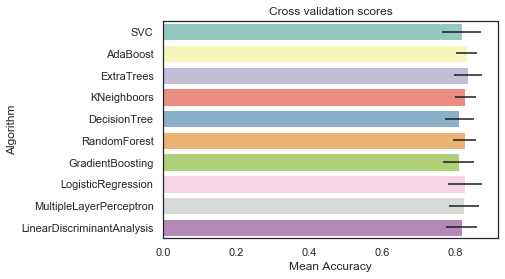

In [62]:
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,
                       "Algorithm":["SVC",
                                    "AdaBoost",
                                    "ExtraTrees",
                                    "KNeighboors",
                                    "DecisionTree",
                                    "RandomForest",
                                    "GradientBoosting",
                                    "LogisticRegression",
                                    "MultipleLayerPerceptron",
                                    "LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [63]:
cv_res

,CrossValMeans,CrossValerrors,Algorithm
0,0.817154,0.053185,SVC
1,0.830524,0.028637,AdaBoost
2,0.832759,0.038466,ExtraTrees
3,0.826042,0.028503,KNeighboors
4,0.810362,0.039815,DecisionTree
5,0.824919,0.031438,RandomForest
6,0.808102,0.041457,GradientBoosting
7,0.824944,0.047067,LogisticRegression
8,0.822722,0.040164,MultipleLayerPerceptron
9,0.817079,0.042557,LinearDiscriminantAnalysis


# Model Evaluation

### AdaBoost classifier

#### Adaboost inizia inserendo un classificatore nel set di dati originale e quindi inserisce copie aggiuntive del classificatore nello stesso set di dati, ma in cui i pesi delle istanze erroneamente classificate vengono regolati in modo tale che i classificatori successivi si concentrino maggiormente su casi difficili.

In [64]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC, random_state=7)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
                  "base_estimator__splitter" :   ["best", "random"],
                  "algorithm" : ["SAMME","SAMME.R"],
                  "n_estimators" :[1,2],
                  "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gsadaDTC.fit(X_train,Y_train)
ada_best = gsadaDTC.best_estimator_
gsadaDTC.best_score_

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   18.5s
[Parallel(n_jobs=4)]: Done 840 tasks      | elapsed:   26.5s
[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:   28.6s finished


0.8125967540574282